# Random Forest - Les stromů je lepší než jeden strom

## Cíl lekce

Pochopíme, proč je více stromů lepších než jeden strom. Naučíme se základy Random Forest algoritmu.

## Moudrost davu - proč více hlav víc ví

### Příklad: Hádání počtu kuliček

Představte si sklenici plnou kuliček. Pět lidí hádá jejich počet:

| Osoba | Odhad kuliček |
|-------|---------------|
| Anna | 450 |
| Bob | 650 |
| Cyril | 500 |
| Dana | 750 |
| Eva | 550 |

**Průměr odhadů:** (450 + 650 + 500 + 750 + 550) / 5 = **580**

**Skutečný počet:** 600 kuliček

**Co vidíme:**
- Jednotlivé odhady se mýlí o 50-150 kuliček
- Průměr se mýlí jen o 20 kuliček!

### Stejný princip funguje u stromů:

- **Jeden strom** = jeden člověk (může se mýlit)
- **Les stromů** = skupina lidí (průměr je přesnější)

## Bootstrap Sampling - jak vytvořit různé datasety

**Bootstrap** = vytváření různých datasetů ze stejných dat pomocí náhodného výběru.

### Jak to funguje:

Máme 5 studentů a chceme vytvořit různé vzorky:

**Původní data:**
| ID | Student |
|----|--------|
| 1 | Anna |
| 2 | Bob |
| 3 | Cyril |
| 4 | Dana |
| 5 | Eva |

**Náhodný výběr s vracením** (můžeme vybrat stejného studenta vícekrát):

| Bootstrap vzorek 1 | Bootstrap vzorek 2 | Bootstrap vzorek 3 |
|-------------------|-------------------|-------------------|
| Bob | Anna | Cyril |
| Anna | Anna | Eva |
| Dana | Eva | Eva |
| Dana | Cyril | Anna |
| Cyril | Bob | Dana |

**Co si všimnout:**
- Některé osoby se opakují (Dana ve vzorku 1)
- Některé osoby chybí (Eva není ve vzorku 1)
- Každý vzorek má stejnou velikost jako originál (5 studentů)

## Out-of-Bag (OOB) vzorky

**OOB vzorky** = data, která nebyla vybrána v bootstrap vzorku.

### Příklad:

| Bootstrap vzorek | Vybrané osoby | OOB (nevybrané) |
|-----------------|---------------|------------------|
| Vzorek 1 | Anna, Bob, Bob, Dana, Eva | Cyril |
| Vzorek 2 | Bob, Cyril, Cyril, Dana, Dana | Anna, Eva |
| Vzorek 3 | Anna, Bob, Bob, Bob, Eva | Cyril, Dana |

**Důležité:** Přibližně 37% dat zůstane nevybráno (OOB) v každém vzorku.

**K čemu to je dobré?** OOB data můžeme použít pro testování - strom je nikdy neviděl!

## Bagging - kombinace Bootstrap + Průměrování

**Bagging** = Bootstrap Aggregating (vzorkování + průměrování)

### Jak funguje Bagging:

1. **Vytvoř několik bootstrap vzorků** z původních dat
2. **Natrénuj strom** na každém vzorku
3. **Pro predikci:**
   - Klasifikace: stromy hlasují, vítězí většina
   - Regrese: vypočítej průměr predikcí

### Příklad hlasování (klasifikace):

Predikce pro nového studenta (hodiny učení = 4):

| Strom | Predikce |
|-------|----------|
| Strom 1 (z bootstrap 1) | Neprošel |
| Strom 2 (z bootstrap 2) | Neprošel |
| Strom 3 (z bootstrap 3) | Prošel |

**Hlasování:** 2× Neprošel, 1× Prošel → **Finální predikce: Neprošel**

## Jednoduchý příklad Baggingu

### Dataset: 5 studentů

| ID | Hodiny učení | Prošel |
|----|--------------|--------|
| 1 | 2 | Ne |
| 2 | 3 | Ne |
| 3 | 5 | Ano |
| 4 | 6 | Ano |
| 5 | 7 | Ano |

### Krok 1: Vytvoření 3 bootstrap vzorků

**Bootstrap 1:** Studenti [1, 2, 2, 4, 5]
- 2 hodiny → Ne
- 3 hodiny → Ne (2×)
- 6 hodin → Ano
- 7 hodin → Ano

**Bootstrap 2:** Studenti [2, 3, 3, 4, 4]
- 3 hodiny → Ne
- 5 hodin → Ano (2×)
- 6 hodin → Ano (2×)

**Bootstrap 3:** Studenti [1, 1, 3, 5, 5]
- 2 hodiny → Ne (2×)
- 5 hodin → Ano
- 7 hodin → Ano (2×)

### Krok 2: Každý vzorek vytvoří svůj strom

- **Strom 1:** Rozděl při hodiny > 4.5
- **Strom 2:** Rozděl při hodiny > 4.0
- **Strom 3:** Rozděl při hodiny > 3.5

### Krok 3: Predikce pro nového studenta (4 hodiny učení)

| Strom | Pravidlo | Predikce |
|-------|----------|----------|
| 1 | 4 > 4.5? Ne | Neprošel |
| 2 | 4 > 4.0? Ne | Neprošel |
| 3 | 4 > 3.5? Ano | Prošel |

**Hlasování:** 2× Neprošel, 1× Prošel → **Výsledek: Neprošel**

## Import knihoven

Nyní, když rozumíme teorii, můžeme importovat knihovny pro praktické ukázky.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Demonstrace Bootstrap Sampling

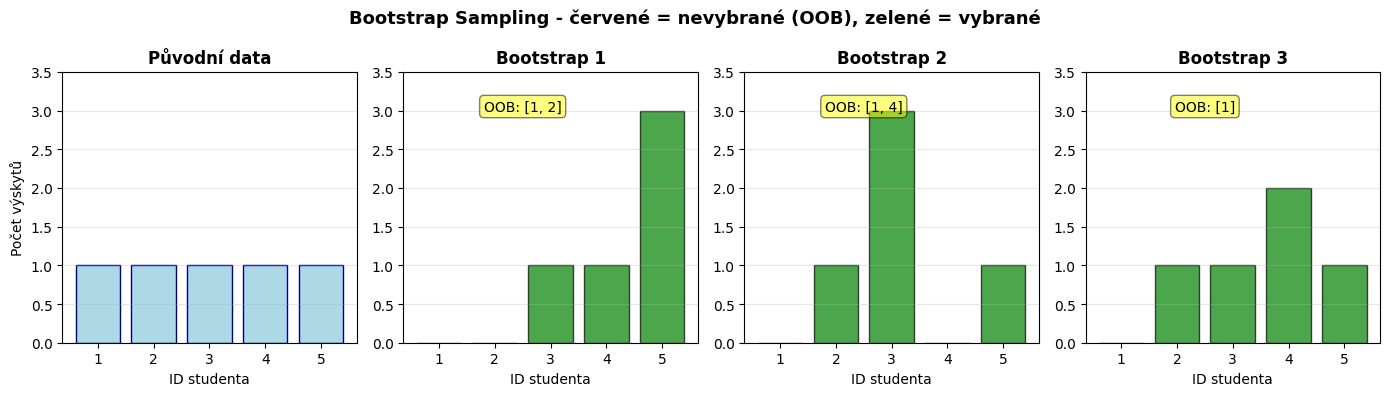

In [2]:
# Simulace bootstrap sampling
np.random.seed(42)
n_samples = 5
n_bootstrap = 3

original_data = np.arange(1, n_samples + 1)

fig, axes = plt.subplots(1, n_bootstrap + 1, figsize=(14, 4))

# Původní data
axes[0].bar(original_data, np.ones(n_samples), color='lightblue', edgecolor='navy')
axes[0].set_xlabel('ID studenta')
axes[0].set_ylabel('Počet výskytů')
axes[0].set_title('Původní data', fontweight='bold')
axes[0].set_ylim(0, 3.5)
axes[0].set_xticks(original_data)
axes[0].grid(True, alpha=0.3, axis='y')

# Bootstrap vzorky
for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(original_data, size=n_samples, replace=True)
    unique, counts = np.unique(bootstrap_sample, return_counts=True)
    
    all_counts = np.zeros(n_samples)
    for u, c in zip(unique, counts):
        all_counts[u-1] = c
    
    colors = ['red' if c == 0 else 'green' for c in all_counts]
    axes[i+1].bar(original_data, all_counts, color=colors, alpha=0.7, edgecolor='black')
    axes[i+1].set_xlabel('ID studenta')
    axes[i+1].set_title(f'Bootstrap {i+1}', fontweight='bold')
    axes[i+1].set_ylim(0, 3.5)
    axes[i+1].set_xticks(original_data)
    axes[i+1].grid(True, alpha=0.3, axis='y')
    
    # OOB vzorky
    oob = [x for x in original_data if all_counts[x-1] == 0]
    if oob:
        axes[i+1].text(2.5, 3, f'OOB: {oob}', fontsize=10, ha='center',
                      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.suptitle('Bootstrap Sampling - červené = nevybrané (OOB), zelené = vybrané', 
            fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## Simulace efektu Baggingu

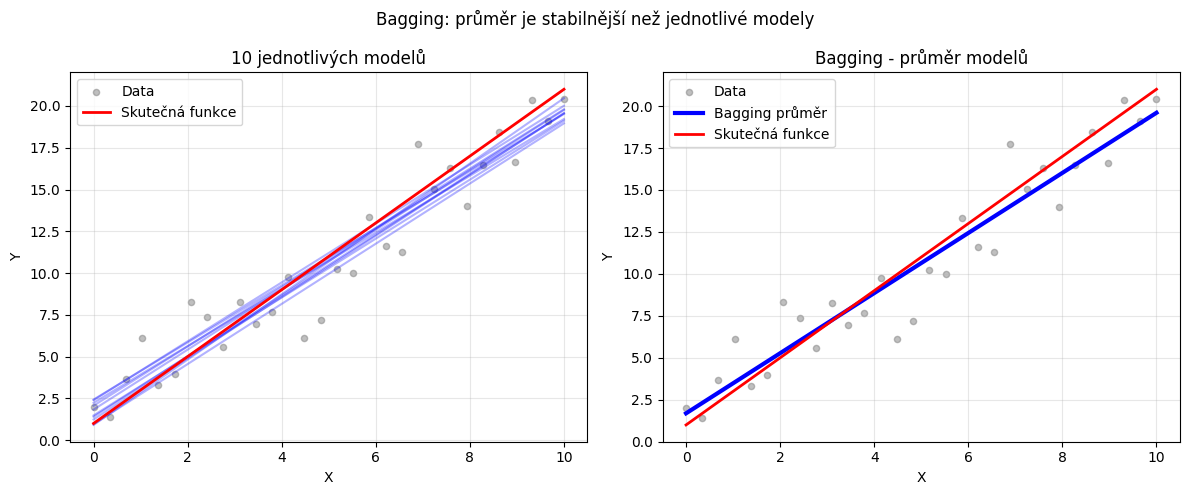

In [3]:
# Jednoduchá simulace bagging efektu
np.random.seed(42)

# Data s šumem
n_points = 30
X = np.linspace(0, 10, n_points)
y_true = 2 * X + 1
y = y_true + np.random.normal(0, 2, n_points)

# Simulace několika modelů
n_models = 10
predictions = []

plt.figure(figsize=(12, 5))

# Graf 1: Jednotlivé modely
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.5, s=20, color='gray', label='Data')

for i in range(n_models):
    # Bootstrap sampling
    indices = np.random.choice(n_points, n_points, replace=True)
    X_boot = X[indices]
    y_boot = y[indices]
    
    # Jednoduchý model
    coeffs = np.polyfit(X_boot, y_boot, 1)
    y_pred = np.polyval(coeffs, X)
    predictions.append(y_pred)
    
    plt.plot(X, y_pred, alpha=0.3, color='blue')

plt.plot(X, y_true, 'r-', linewidth=2, label='Skutečná funkce')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{n_models} jednotlivých modelů')
plt.legend()
plt.grid(True, alpha=0.3)

# Graf 2: Průměr (Bagging)
plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.5, s=20, color='gray', label='Data')

# Průměr všech predikcí
bagging_pred = np.mean(predictions, axis=0)
plt.plot(X, bagging_pred, 'b-', linewidth=3, label='Bagging průměr')
plt.plot(X, y_true, 'r-', linewidth=2, label='Skutečná funkce')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bagging - průměr modelů')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Bagging: průměr je stabilnější než jednotlivé modely')
plt.tight_layout()
plt.show()

## Shrnutí

### Co jsme se naučili:

1. **Moudrost davu** - průměr mnoha odhadů je přesnější než jednotlivé odhady

2. **Bootstrap sampling** vytváří různé datasety:
   - Výběr s vracením
   - Každý vzorek má stejnou velikost
   - ~37% dat zůstává nevybráno (OOB)

3. **Bagging = Bootstrap + Průměrování:**
   - Vytvoř několik bootstrap vzorků
   - Natrénuj strom na každém
   - Zprůměruj predikce

4. **Výsledek:** Stabilnější a přesnější predikce než jeden strom

### Příští krok:
Random Forest přidává další vylepšení - náhodný výběr features!